# Club Geocoding

This notebook is to begin clean the district club data for use in a district realignment using a genetic algorithm.

The columns that I'll need are `club number, zipcode, current area, members, new members, and member awards`. Member awards are not available directly but can be copy/pasted from the relevant report.

The columns I'll need to calculate are `lat/long, awards/member, new/renewing member ratio, and normalized versions of those` and members. 

A consideration is that membership and awards can change on a weekly basis.

Additionally, DCP goals are typically used as a group balancing criterion. I'm opting to focus on membership, awards, and opportunities which I believe better reflect club health. 

I'll need to manually fill in information for newly chartered clubs prior to importing them.

In this notebook, we'll just focus on getting the lat/long.

In [1]:
import pandas as pd
import zipcodes

### Get the zip codes

In [2]:
# This csv has zip codes in it.
# It also had extra lines in the original Excel file

clubs_raw_zip = pd.read_csv('Clubs_D50.csv')
clubs_raw_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      206 non-null    float64
 1   Division      261 non-null    object 
 2   Area          261 non-null    float64
 3   Club          221 non-null    float64
 4   Clubname      224 non-null    object 
 5   Clubest       221 non-null    object 
 6   Clubstatus    221 non-null    object 
 7   DCP           0 non-null      float64
 8   Members       0 non-null      float64
 9   Clubcity      221 non-null    object 
 10  Clubstate     221 non-null    object 
 11  Clubzip       221 non-null    object 
 12  Clubcountry   221 non-null    object 
 13  Clubphone     198 non-null    object 
 14  Clubday_o     221 non-null    object 
 15  Clubtime_o    221 non-null    object 
 16  Clubday       219 non-null    object 
 17  Clubtime      221 non-null    object 
 18  Clublen       221 non-null    

In [3]:
# Make a new dataframe with just the club number, zip code, and drop the blank lines
club_zip = clubs_raw_zip[['Club', 'Clubzip']].copy().dropna()

# Make the club number an integer
club_zip['Club'] = club_zip['Club'].astype(int)

# Rename the columns
club_zip = club_zip.rename(columns = {'Club': 'club_no', 'Clubzip': 'zip'})

club_zip.head()

,club_no,zip
0,5509,75501
1,7036,75501
2,584009,71110
3,9682,71101
4,1100434,75501-6314


In [4]:
club_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 282
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   club_no  221 non-null    int32 
 1   zip      221 non-null    object
dtypes: int32(1), object(1)
memory usage: 4.3+ KB


### Get the lat/long for the zip codes

In [5]:
# Using zipcodes matching function
# See https://pypi.org/project/zipcodes/ for documentation
club_zip['lat'] = [zipcodes.matching(i)[0]['lat'] for i in club_zip['zip']]
club_zip['long'] = [zipcodes.matching(i)[0]['long'] for i in club_zip['zip']]
club_zip.head(10)

,club_no,zip,lat,long
0,5509,75501,33.3672,-94.2356
1,7036,75501,33.3672,-94.2356
2,584009,71110,32.5153,-93.6345
3,9682,71101,32.5072,-93.7444
4,1100434,75501-6314,33.3672,-94.2356
6,718,71101,32.5072,-93.7444
7,4819,71106,32.3938,-93.7286
8,9790,71111,32.5695,-93.6941
9,5069647,71023,32.4692,-93.3882
10,7575630,71103-4228,32.4918,-93.7762


In [6]:
# Convert coordinates to numbers
club_zip['long'] = club_zip['long'].astype(float)
club_zip['lat'] = club_zip['lat'].astype(float)

In [7]:
# Save it for later import
club_zip.to_csv('club_zips.csv', index=False)

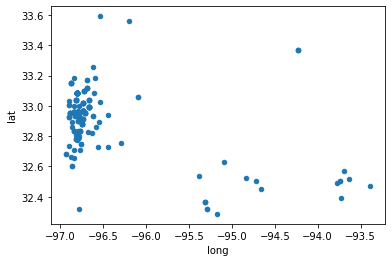

In [8]:
# Plot it just for giggles
# FYI, this is the eastern half of DFW and outlying areas
club_zip.plot(x='long', y='lat', kind='scatter');